In [1]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn import svm
import sys
# sys.path.append('/home/ralfahad/PythonUtility/PTE')
# from PhaseTE_MF import PhaseTE_MF
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import warnings
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load the metadata
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
Metadata=pd.read_csv(path)
Metadata.head(2)

,Unnamed: 0,label,0,1,2,3,4,5,6,7,...,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427
0,0,0.0,7.534168e-11,6.231124e-10,-7.806000e-10,-8.063316e-10,4.260259e-10,8.792373e-11,-2.653489e-10,2.412203e-10,...,1.956881e-10,2.334939e-10,-7.550422e-11,1.972939e-10,3.158191e-10,2.702473e-10,2.155772e-10,2.427227e-10,-1.328829e-10,-5.014970e-10
1,1,0.0,2.256533e-10,1.718130e-10,1.905604e-11,1.276511e-11,-1.379325e-10,-6.269328e-11,-2.930309e-10,2.040993e-10,...,2.343108e-10,2.950671e-11,-2.800265e-10,1.916018e-10,2.510715e-10,1.861655e-10,-2.830894e-10,2.069608e-10,-7.302684e-11,-2.662402e-10


In [3]:
X=Metadata.iloc[:,2:]
y=Metadata['label']
X.shape,y.shape

((1863, 1428), (1863,))

In [4]:
# TSNE

In [5]:
import sys
import os

from scipy import linalg as LA


np.set_printoptions(precision=3, linewidth=110, suppress=True)




def LDA(data, labels, dim_rescale):
    '''
    Linear Discriminant Analysis
    pass in:
        (i) a raw data array--features encoded in the cols;
            one data instance per row;
        (ii) EV, explanatory variable, is included in D as last column;
        (iii) the LDA flag is set to False so PCA is the default techique;
            if both LDA & EV are set to True then LDA is performed
            instead of PCA
    returns:
        (i) eigenvalues (1D array);
        (ii) eigenvectors (2D array)
        (iii) covariance matrix
    some numerical assertions:
    >>> # sum of the eigenvalues is equal to trace of R
    >>> x = R.trace()
    >>> x1 = eva.sum()
    >>> NP.allclose(x, x1)
    True
    >>> # determinant of R is product of eigenvalues
    >>> q = LA.det(R)
    >>> q1 = NP.prod(eva)
    >>> NP.allclose(q, q1)
    True
    '''
    assert data.shape[0] == labels.shape[0]
    # mean center the data array
    data -= data.mean(axis=0)
    nrow, ndim = data.shape
    # pre-allocate sw, sb arrays (both same shape as covariance matrix)
    # s_wc: array encoding 'within class' scatter
    # s_bc: array encoding 'between class' scatter
    s_wc = np.zeros((ndim, ndim))
    s_bc = np.zeros((ndim, ndim))
    R = np.cov(data.T)
    classes = np.unique(labels)
    for c in range(len(classes)):
        # create an index only for data rows whose class label = classes[c]
        idx = np.squeeze(np.where(labels == classes[c]))
        d = np.squeeze(data[idx,:])
        class_cov = np.cov(d.T)
        s_wc += float(idx.shape[0]) / nrow * class_cov
    s_bc = R - s_wc
    # now solve for w then compute the mapped data
    evals, evecs = LA.eig(s_wc, s_bc)
    np.ascontiguousarray(evals)
    np.ascontiguousarray(evecs)
    # sort the eigenvectors based on eigenvalues sort order
    idx = np.argsort(evals)
    idx = idx[::-1]
    evecs = evecs[:,idx]
    # take just number of eigenvectors = dim_rescale
    evecs_dr = evecs[:,:dim_rescale]
    # multiply data array & remaining set of eigenvectors
    rescaled_data = np.dot(data, evecs_dr)
    return rescaled_data, evecs_dr

In [6]:
#rescaled_data, w = LDA(X_WM_Row_scale, y_WM_Row_scale,50)
a, w1 = LDA(np.asarray(X), np.asarray(y), 50)# X_WM_Row_scale,y_WM_Row_scale

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=3, init='pca')
Y = tsne.fit_transform(a)

(777, 2) (1086, 2)
tSNE_KDE_plot_edit_2.png


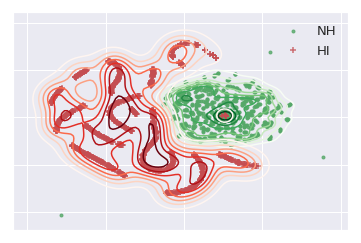

In [8]:
#lb2="Fast RT"
#lb3="Medium RT"
lb1="NH"
lb2="HI"
fileName="tSNE_KDE_plot_edit_2"

a1=Y[np.where(y==0), 0]
b1=Y[np.where(y==0), 1]
c1= Y[np.where(y==1), 0]
d1 = Y[np.where(y==1), 1]
# e1= Y[np.where(y==2), 0]
# f1 = Y[np.where(y==2), 1]

dftt1=pd.concat([pd.DataFrame(a1),pd.DataFrame(b1)], axis=0).transpose()
dftt2=pd.concat([pd.DataFrame(c1),
                pd.DataFrame(d1)], axis=0).transpose()
# dftt3=pd.concat([pd.DataFrame(e1),
#                 pd.DataFrame(f1)], axis=0).transpose()
print dftt1.shape,dftt2.shape#,dftt3.shape
dftt1.columns= ['a','b']
dftt2.columns= ['c','d']
#dftt3.columns= ['e','f']
ax = sns.kdeplot(dftt1['a'],dftt1['b'], cmap="Greens", shade=False, shade_lowest=False)
ax = sns.regplot(dftt1['a'], dftt1['b'],marker= '.', color='g',  fit_reg=False,label=lb1)
ax.legend(loc="best",framealpha=0.0)
# #plt.legend(loc='upper left')
ax = sns.kdeplot(dftt2['c'],dftt2['d'],cmap="Reds", shade=False, shade_lowest=False)
ax = sns.regplot(dftt2['c'], dftt2['d'],marker= '+', color='r',  fit_reg=False, label=lb2)

# ax = sns.kdeplot(dftt3['e'],dftt3['f'],cmap="Blues", shade=False, shade_lowest=False)
# ax = sns.regplot(dftt3['e'], dftt3['f'],marker= '*', color='b',  fit_reg=False, label=lb3)
ax.legend(loc="best",framealpha=0.0)

# Add labels to the plot
red = sns.color_palette("Greens")[-2]
blue = sns.color_palette("Reds")[-2]
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_ticklabels([])
ax.xaxis.set_ticklabels([])
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

#sns.despine()
# Save image

save_format='png'
print str(fileName)+'.'+save_format
plt.savefig(fileName+'.'+save_format,dpi=300)

In [9]:
#Micro AUC for multiclass classification 

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve, auc
# from scipy import interp
# from sklearn import preprocessing

# def MulticlassAuc(y_test,y_p): # y_test, y_p is the test and predict data
#     lb = preprocessing.LabelBinarizer() # binarize the data
#     lb.fit(y_test)
#     n_classes=len(lb.classes_)
#     y_test_b=lb.transform(y_test)
#     y_p_b=lb.transform(y_p)

#     # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     for i in range(3):
#         fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_p_b[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # First aggregate all false positive rates
#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#     # Then interpolate all ROC curves at this points
#     mean_tpr = np.zeros_like(all_fpr)
#     for i in range(n_classes):
#         mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#     # Finally average it and compute AUC
#     mean_tpr /= n_classes

#     fpr["macro"] = all_fpr
#     tpr["macro"] = mean_tpr
#     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
#     return roc_auc["macro"]

# Apply SVM on Data

In [10]:
gamma_range = np.logspace(-2, 2, 5)
gamma_range

array([  0.01,   0.1 ,   1.  ,  10.  , 100.  ])

In [11]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

#C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
C_range = np.logspace(-2, 2, 5)
#gamma_range = np.logspace(-2, 2, 5)

print C_range,gamma_range


(1863, 1428) (1863,)
[  0.01   0.1    1.    10.   100.  ] [0.01, 0.002, 0.00069, 0.0007, 0.0005]


In [12]:
#Classifiaction:
# #Splitting
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4,
                                                    random_state=42)
cv = ShuffleSplit(X_train.shape[0], test_size=0.4, random_state=42)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
C_range = np.logspace(-2, 2, 5)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
param_grid = dict(gamma=gamma_range, C=C_range)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)

clf_Tune.fit(X_train,y_train)
print 'Finish tuning'    
    
    

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  5.8min finished


Finish tuning


In [13]:
#Micro AUC for multiclass classification 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn import preprocessing

def MulticlassAuc(y_test,y_p): # y_test, y_p is the test and predict data
    lb = preprocessing.LabelBinarizer() # binarize the data
    lb.fit(y_test)
    n_classes=len(lb.classes_)
    y_test_b=lb.transform(y_test)
    y_p_b=lb.transform(y_p)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_p_b[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return roc_auc["macro"]

In [14]:
from sklearn.metrics import classification_report

y_p = clf_Tune.best_estimator_.predict(X_test)
ACC=classification_report(y_test, y_p)
print ACC
ACC_AVG=accuracy_score(y_test, y_p)
print ACC_AVG

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
AUC_Th2_T=metrics.auc(fpr, tpr)
print AUC_Th2_T

             precision    recall  f1-score   support

          0       0.92      0.88      0.90       313
          1       0.92      0.94      0.93       433

avg / total       0.92      0.92      0.92       746

0.9182305630026809
0.9131809428240449


Text(0.5,1,"Validation accuracy=0.902417188899, best {'C': 10.0, 'gamma': 0.00069}")

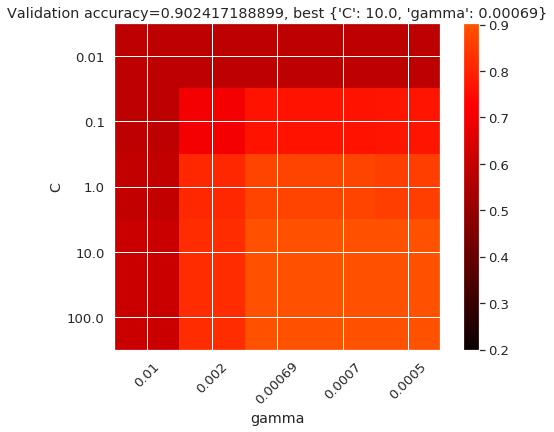

In [15]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
scores = clf_Tune.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
#print scores.shape,len(C_range),len(gamma_range)
plt.figure(figsize=(8, 6))
#plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_))

#filename='ParameterTuning'
#save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
#plt.show()

# Find Significant correlation with stability selections 

### Make the dataset

In [16]:
# Pre Processing 

In [17]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

(1863, 1428) (1863, 1)


# TSNE Visulaization

In [18]:
# import sys
# import os

# from scipy import linalg as LA


# np.set_printoptions(precision=3, linewidth=110, suppress=True)




# def LDA(data, labels, dim_rescale):
#     '''
#     Linear Discriminant Analysis
#     pass in:
#         (i) a raw data array--features encoded in the cols;
#             one data instance per row;
#         (ii) EV, explanatory variable, is included in D as last column;
#         (iii) the LDA flag is set to False so PCA is the default techique;
#             if both LDA & EV are set to True then LDA is performed
#             instead of PCA
#     returns:
#         (i) eigenvalues (1D array);
#         (ii) eigenvectors (2D array)
#         (iii) covariance matrix
#     some numerical assertions:
#     >>> # sum of the eigenvalues is equal to trace of R
#     >>> x = R.trace()
#     >>> x1 = eva.sum()
#     >>> NP.allclose(x, x1)
#     True
#     >>> # determinant of R is product of eigenvalues
#     >>> q = LA.det(R)
#     >>> q1 = NP.prod(eva)
#     >>> NP.allclose(q, q1)
#     True
#     '''
#     assert data.shape[0] == labels.shape[0]
#     # mean center the data array
#     data -= data.mean(axis=0)
#     nrow, ndim = data.shape
#     # pre-allocate sw, sb arrays (both same shape as covariance matrix)
#     # s_wc: array encoding 'within class' scatter
#     # s_bc: array encoding 'between class' scatter
#     s_wc = np.zeros((ndim, ndim))
#     s_bc = np.zeros((ndim, ndim))
#     R = np.cov(data.T)
#     classes = np.unique(labels)
#     for c in range(len(classes)):
#         # create an index only for data rows whose class label = classes[c]
#         idx = np.squeeze(np.where(labels == classes[c]))
#         d = np.squeeze(data[idx,:])
#         class_cov = np.cov(d.T)
#         s_wc += float(idx.shape[0]) / nrow * class_cov
#     s_bc = R - s_wc
#     # now solve for w then compute the mapped data
#     evals, evecs = LA.eig(s_wc, s_bc)
#     np.ascontiguousarray(evals)
#     np.ascontiguousarray(evecs)
#     # sort the eigenvectors based on eigenvalues sort order
#     idx = np.argsort(evals)
#     idx = idx[::-1]
#     evecs = evecs[:,idx]
#     # take just number of eigenvectors = dim_rescale
#     evecs_dr = evecs[:,:dim_rescale]
#     # multiply data array & remaining set of eigenvectors
#     rescaled_data = np.dot(data, evecs_dr)
#     return rescaled_data, evecs_dr



In [19]:
# #Micro AUC for multiclass classification 

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve, auc
# from scipy import interp
# from sklearn import preprocessing

# def MulticlassAuc(y_test,y_p): # y_test, y_p is the test and predict data
#     lb = preprocessing.LabelBinarizer() # binarize the data
#     lb.fit(y_test)
#     n_classes=len(lb.classes_)
#     y_test_b=lb.transform(y_test)
#     y_p_b=lb.transform(y_p)

#     # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     for i in range(3):
#         fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_p_b[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # First aggregate all false positive rates
#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#     # Then interpolate all ROC curves at this points
#     mean_tpr = np.zeros_like(all_fpr)
#     for i in range(n_classes):
#         mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#     # Finally average it and compute AUC
#     mean_tpr /= n_classes

#     fpr["macro"] = all_fpr
#     tpr["macro"] = mean_tpr
#     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
#     return roc_auc["macro"]

### Randomized Logistic Regression 

In [20]:
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,
                                  LassoLarsCV)
from sklearn.exceptions import ConvergenceWarning

#Model Library
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path, LassoLarsCV)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn import svm


# Performance analysis library 
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split # test train split
from sklearn.model_selection import ShuffleSplit

In [21]:
with warnings.catch_warnings():
    #warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', ConvergenceWarning)
    lars_cv = LassoLarsCV(cv=10).fit(X, y)
lars_cv.alphas_

array([0.003])

In [22]:
# Run the RandomizedLasso: we use a paths going down to .1*alpha_max
# to avoid exploring the regime in which very noisy variables enter
# the model
alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 10)
print alphas
clf = RandomizedLasso(alpha=alphas, random_state=42,max_iter=1000).fit(X, y)

[0.003 0.003 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.   ]


In [23]:
clf.scores_

array([0.085, 0.005, 0.025, ..., 0.205, 0.055, 0.01 ])

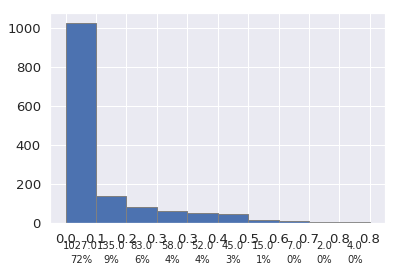

In [24]:
from matplotlib.ticker import FormatStrFormatter
data=clf.scores_
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.grid(True)
plt.show()

### Find the optimal threshold

In [25]:
Th_2_Bins_Index= np.where((bins<=0.9) & (bins>=0.1)) # take the bins within a range
print bins
Th_2_Bins=bins[Th_2_Bins_Index]
print Th_2_Bins

[0.    0.083 0.167 0.25  0.334 0.417 0.501 0.584 0.668 0.751 0.835]
[0.167 0.25  0.334 0.417 0.501 0.584 0.668 0.751 0.835]


In [26]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(1863, 1428) (1863, 1)
(1117, 1428) (746, 1428) (1117, 1) (746, 1)


In [27]:
X_train[:,1:10]

array([[-0.133, -0.137,  0.121, ..., -0.181,  0.745,  1.158],
       [-0.79 ,  0.063, -0.48 , ..., -0.026,  0.468, -0.708],
       [ 0.54 , -0.971, -1.056, ..., -0.322,  0.549, -0.541],
       ...,
       [ 0.699, -0.113,  0.238, ...,  1.553, -1.499, -0.647],
       [ 0.995, -0.489, -0.246, ..., -1.587,  0.512,  0.475],
       [ 0.644, -1.122, -1.276, ...,  0.337, -0.658, -0.52 ]])

In [28]:
type(X_train)#[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))].shape#,y_train

numpy.ndarray

In [29]:
C_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))],y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   46.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  0.01,   0.1 ,   1.  ,  10.  , 100.  ]), 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [30]:
# use tuned parameter on to get model
y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))])

print accuracy_score(y_test, y_p)

0.9088471849865952


In [31]:
# #Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=42)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)

C_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
#gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
##  Define LeaveOneOutCrossValidation
#loocv = LeaveOneOut()
ACC_Th2=[]
AUC_Th2=[]
Bins=[]
for i in Th_2_Bins:
    print i
    try:
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        
        #Hyper parameter Tuning 
        clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))],y_train)
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape ,y_train.shape
        print 'Finish tuning'

        # use tuned parameter on to get model
        y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

        ACC_Th2_T=accuracy_score(y_test, y_p)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
        AUC_Th2_T=metrics.auc(fpr, tpr)
        print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        print 'ACC',ACC_Th2_T,AUC_Th2_T
        ACC_Th2.append(ACC_Th2_T)
        AUC_Th2.append(AUC_Th2_T)
        Bins.append(i)
    except:
        print 'error at:',i
    # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
    # roc_auc_T = auc(false_positive_rate, true_positive_rate)
    # print 'AUC',roc_auc_T
    # AUC_Th2.append(roc_auc_T)

0.16699999999999998
(1117, 266)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   45.5s finished


(1117, 266) (1117, 1)
Finish tuning
Shape (746, 266)
ACC 0.9048257372654156 0.9051752761401619
0.25049999999999994
(1117, 183)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   31.6s finished


(1117, 183) (1117, 1)
Finish tuning
Shape (746, 183)
ACC 0.8900804289544236 0.8898169395479935
0.33399999999999996
(1117, 125)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   23.9s finished


(1117, 125) (1117, 1)
Finish tuning
Shape (746, 125)
ACC 0.9142091152815014 0.9114875783042744
0.4175
(1117, 73)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   16.6s finished


(1117, 73) (1117, 1)
Finish tuning
Shape (746, 73)
ACC 0.871313672922252 0.8683381416523399
0.5009999999999999
(1117, 28)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   10.5s finished


(1117, 28) (1117, 1)
Finish tuning
Shape (746, 28)
ACC 0.8605898123324397 0.8586575566852851
0.5844999999999999
(1117, 13)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.6s finished


(1117, 13) (1117, 1)
Finish tuning
Shape (746, 13)
ACC 0.7761394101876675 0.7721852887573877
0.6679999999999999
(1117, 6)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.6s finished


(1117, 6) (1117, 1)
Finish tuning
Shape (746, 6)
ACC 0.707774798927614 0.6938146079436873
0.7515
(1117, 4)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 118 out of 125 | elapsed:    6.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.3s finished


(1117, 4) (1117, 1)
Finish tuning
Shape (746, 4)
ACC 0.6501340482573726 0.6237963830619276
0.835
(1117,)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
error at: 0.835


In [32]:
# accuracy_score(y_test, y_p)
# MulticlassAuc(y_test,y_p)

In [33]:
        
#         ACC_Th2_T=accuracy_score(y_test, y_p)
#         AUC_Th2_T=MulticlassAuc(y_test,y_p)
#         print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
#         print 'ACC',ACC_Th2_T,AUC_Th2_T
#         ACC_Th2.append(ACC_Th2_T)
#         AUC_Th2.append(AUC_Th2_T)
#         Bins.append(i)
#     except:
#         print 'error at:',i
#     # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
#     # roc_auc_T = auc(false_positive_rate, true_positive_rate)
#     # print 'AUC',roc_auc_T
#     # AUC_Th2.append(roc_auc_T)

In [34]:
ACC_Th2 

[0.9048257372654156,
 0.8900804289544236,
 0.9142091152815014,
 0.871313672922252,
 0.8605898123324397,
 0.7761394101876675,
 0.707774798927614,
 0.6501340482573726]

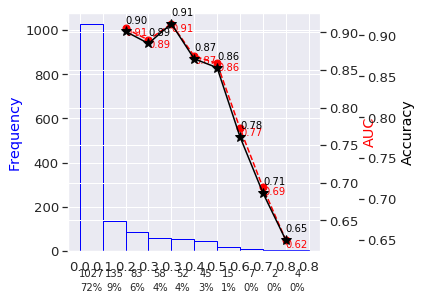

In [35]:
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
data=clf.scores_
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,10,facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


bin_centers = 0.5 * np.diff(bins) + bins[:-1]







#show % value
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')



    
    
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed' )#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red')
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.2f" % j),xy=(i,j-0.01), color ='red') ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")


    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black')






for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.2f" % j),xy=(i,j+0.01), color='black')##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black")
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')


    
    
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)


#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=0.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency')
ax.yaxis.label.set_color('Blue')
plt.tight_layout()
# #Save the image

filename='Corr_StabilitySelection_TH2'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()



In [36]:
# for i,j in zip(Th_2_Bins,AUC_Th2):
#     print i,j
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
NumberofElement=[]
for i,j,k in zip(Th_2_Bins,ACC_Th2,AUC_Th2):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
    print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append("{0:.2f}".format(i))
    All_ACC.append("{0:.2f}".format(j))
    All_AUC.append("{0:.2f}".format(k))

Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle']
Selected_Feature_Result

0.17 0.90 0.91 266
0.25 0.89 0.89 183
0.33 0.91 0.91 125
0.42 0.87 0.87 73
0.50 0.86 0.86 28
0.58 0.78 0.77 13
0.67 0.71 0.69 6
0.75 0.65 0.62 4


,Threshold,ACC,AUC,NoEle
0,0.17,0.90,0.91,266
1,0.25,0.89,0.89,183
2,0.33,0.91,0.91,125
3,0.42,0.87,0.87,73
4,0.50,0.86,0.86,28
5,0.58,0.78,0.77,13
6,0.67,0.71,0.69,6
7,0.75,0.65,0.62,4


In [37]:
# Need to chage gamma range . It is selecting too many features

# Let 0.34 is our best Thr. TO get the index numer with this thr


fealoc=np.squeeze(np.asarray(np.where(clf.scores_>=0.34)))
fealoc

# Do you get it? yes > How about number of support of the model?

array([  14,   49,   58,   62,   85,  112,  117,  126,  157,  166,  184,  194,  201,  217,  220,  229,  238,
        248,  262,  269,  271,  272,  286,  306,  311,  321,  326,  337,  338,  345,  361,  370,  373,  379,
        389,  404,  405,  428,  438,  441,  445,  447,  452,  462,  472,  476,  477,  497,  499,  515,  526,
        532,  545,  558,  590,  605,  647,  658,  659,  689,  740,  742,  744,  752,  762,  764,  780,  787,
        801,  808,  813,  820,  821,  827,  835,  843,  859,  871,  887,  904,  938,  939,  956,  983,  996,
       1000, 1006, 1011, 1024, 1059, 1068, 1069, 1078, 1092, 1127, 1136, 1156, 1157, 1160, 1161, 1170, 1171,
       1177, 1195, 1218, 1228, 1229, 1231, 1237, 1238, 1245, 1258, 1273, 1274, 1356, 1357, 1404, 1420, 1422,
       1424])

In [38]:
ROI=fealoc%68
ROI
np.unique(ROI,return_counts=True)

(array([ 0,  1,  3,  4,  5,  7,  9, 11, 13, 14, 15, 16, 17, 19, 20, 21, 23, 25, 27, 30, 31, 32, 33, 34, 35,
        37, 39, 43, 44, 46, 47, 48, 49, 50, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67]),
 array([3, 3, 1, 7, 4, 1, 1, 1, 2, 6, 1, 2, 1, 1, 2, 5, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 8, 1, 5, 2, 1, 4, 6, 2,
        1, 4, 2, 1, 5, 1, 3, 1, 4, 5, 6, 1, 1]))

In [39]:
len(np.unique(ROI))
# np.unique(ROI,return_counts=True)

47

In [40]:
for th in [0.17, 0.25,0.34,0.42]:
    clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))],y_train)
    print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape ,y_train.shape
    print 'Finish tuning'
    print float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape[0]*100
# use tuned parameter on to get model
#y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   44.0s finished


(1117, 266) (1117, 1)
Finish tuning
46.9113697404
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   32.4s finished


(1117, 187) (1117, 1)
Finish tuning
41.6293643688
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   22.9s finished


(1117, 120) (1117, 1)
Finish tuning
64.5478961504
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   16.5s finished


(1117, 73) (1117, 1)
Finish tuning
48.5228290063


In [41]:
float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.25)))].shape[0]*100

48.52282900626679

In [42]:
# result it overfitting need to be less or equal to 40%

# Sultan----------->>>>>>>>>>>>>>>>>>>> End Here 

In [43]:
a=[0,1,7,8,68,1427]
b=np.array(a)
b%68

array([ 0,  1,  7,  8,  0, 67])